# EDA

In this Jupyter notebook, I will apply a brief EDA of the dataset used to implement this semantic search engine. In detail, here, I will display some basic statisticcs about the text and the images of the sample dataset. 

# 0. Loading the sample dataset

In [5]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = load_dataset("json", data_files="../dataset/sample.jsonl")["train"]

Generating train split: 0 examples [00:00, ? examples/s]

Display the metadata of a row in the dataset

In [4]:
dataset[0]

{'question_id': 'COCO_val2014_000000203564.jpg',
 'question': 'Please carefully observe the image and come up with a caption for the image.',
 'answer': ['A bicycle replica with a clock as the front wheel.',
  'The bike has a clock as a tire.',
  'A black metal bicycle with a clock inside the front wheel.',
  'A bicycle figurine in which the front wheel is replaced with a clock\n',
  'A clock with the appearance of the wheel of a bicycle '],
 'id': 37,
 'license': 4,
 'file_name': 'COCO_val2014_000000203564.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000203564.jpg',
 'height': 400,
 'width': 400,
 'date_captured': datetime.datetime(2013, 11, 15, 3, 12, 47)}

# 1. Compute Statistics

We are interested to compute the statistics of the text and the image metadata of this dataset. The field to analyse for the text metadata is the "answer" which contains possible answers/captions for the image "coco_url". 
Usually, we need to load an image to compute it height and width. thankfully, in this dataset there is such information in the corresponding fields, so it is unnecessary to load the images to extract the metadata.

## 1.1 Text Statistics

Here, I will compute statistics about the nukber of possibles answers per image, the avg length of an answer and the standard deviation of the length of the answers.

In [6]:
no_answers = []
len_answers = []

In [8]:
for metadata in dataset:
    answers = metadata["answer"]
    no_answers.append(len(answers))
    len_answers += [len(answer.split()) for answer in answers]

In [9]:
avg_answers_per_image = np.mean(no_answers)
avg_len_answers = np.mean(len_answers)
std_len_answers = np.std(len_answers)

In [12]:
constanct_no_answers_flag = [True for answer in answers if answer==5]
if False in constanct_no_answers_flag:
    print("the possible answer are not of a constant number")
else:
    print("for all the images there are only 5 possible answers")

for all the images there are only 5 possible answers


In [22]:
print("Avg length of answers:", avg_len_answers)
print("Standard deviation of answers:", std_len_answers)

Avg length of answers: 10.005940594059405
Standard deviation of answers: 2.0609438279141594


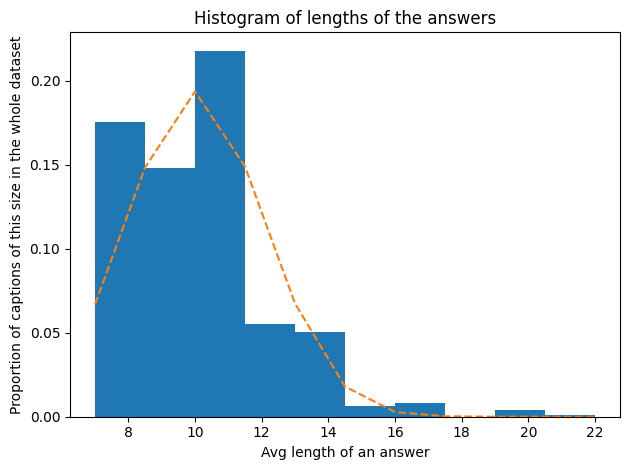

In [26]:
bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(len_answers, bins, density=True)
fit_line = ((1 / (np.sqrt(2 * np.pi) * std_len_answers)) *
     np.exp(-0.5 * (1 / std_len_answers * (bins - avg_len_answers))**2))
ax.set_xlabel('Avg length of an answer')
ax.set_ylabel('Proportion of captions of this size in the whole dataset')
ax.set_title("Histogram of lengths of the answers")
ax.plot(bins, fit_line, "--")
fig.tight_layout()
plt.show()

As you can see, the avg length of the answers follows a Right Skewed Distribution

## 1.2 Image statistics

In [19]:
heights = []
widths = []

In [20]:
for metadata in dataset:
    heights.append(metadata["height"])
    widths.append(metadata["width"])

In [23]:
avg_heigth = np.mean(heights)
avg_width = np.mean(widths)
std_heigth = np.std(heights)
std_width = np.std(widths)

In [25]:
print("AVG height of an image is", avg_heigth," and the standard deviation is", std_heigth)
print("AVG width of an image is", avg_width," and the standard deviation is", std_width)

AVG height of an image is 486.2277227722772  and the standard deviation is 94.16720763527044
AVG width of an image is 582.7029702970297  and the standard deviation is 85.90203314304048


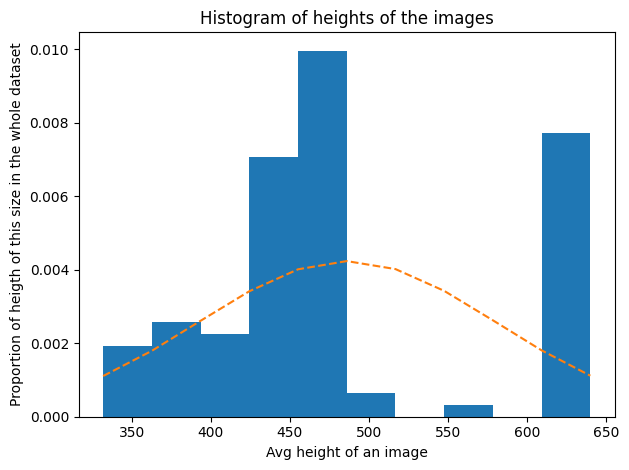

In [27]:
bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(heights, bins, density=True)
fit_line = ((1 / (np.sqrt(2 * np.pi) * std_heigth)) *
     np.exp(-0.5 * (1 / std_heigth * (bins - avg_heigth))**2))
ax.set_xlabel('Avg height of an image')
ax.set_ylabel('Proportion of heigth of this size in the whole dataset')
ax.set_title("Histogram of heights of the images")
ax.plot(bins, fit_line, "--")
fig.tight_layout()
plt.show()

I do not know what kind of distribution it is :)

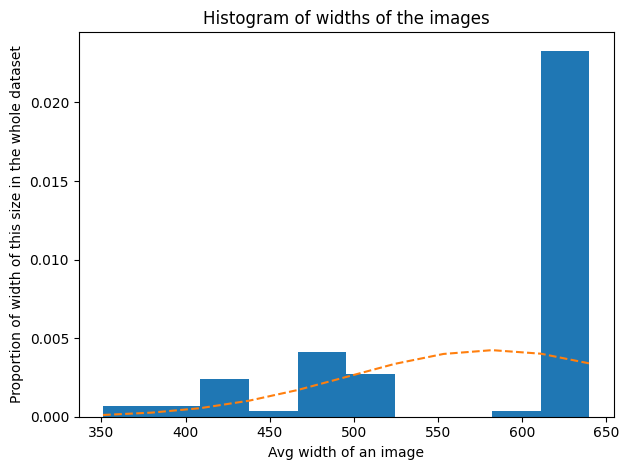

In [28]:
bins = 10
fig, ax = plt.subplots()
n, bins, patches = ax.hist(widths, bins, density=True)
fit_line = ((1 / (np.sqrt(2 * np.pi) * std_heigth)) *
     np.exp(-0.5 * (1 / std_width * (bins - avg_width))**2))
ax.set_xlabel('Avg width of an image')
ax.set_ylabel('Proportion of width of this size in the whole dataset')
ax.set_title("Histogram of widths of the images")
ax.plot(bins, fit_line, "--")
fig.tight_layout()
plt.show()

It seems that the width and the height fluctuates a lot, which will negatively affect the accuracy of the model. In this repo we will not resize any image, however, it will be a good next step to do so in order to improve the accuracy of the model